In [1]:
import sys
from pathlib import Path

parent_dir = Path.cwd().parent
sys.path.append(str(parent_dir))

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from typing import Callable
from numpy.typing import NDArray

from src.elements import ShapeFunctions
from src.fem_solver import solve_boundary_value_problem

In [16]:
def rhs_function(a: float, xb: float) -> Callable[[NDArray[np.float64]], NDArray[np.float64]]:
    def f(x: NDArray[np.float64]) -> NDArray[np.float64]:
        b = x - xb
        numerator = 2 * (a + a**3 * b * (b - x + 1))
        denominator = (a**2 * b**2 + 1)**2
        return numerator / denominator

    return f

def analytic_solution(a: float, xb: float):
    return lambda x: (1 - x) * (np.arctan(a * (x - xb)) + np.arctan(a * xb))

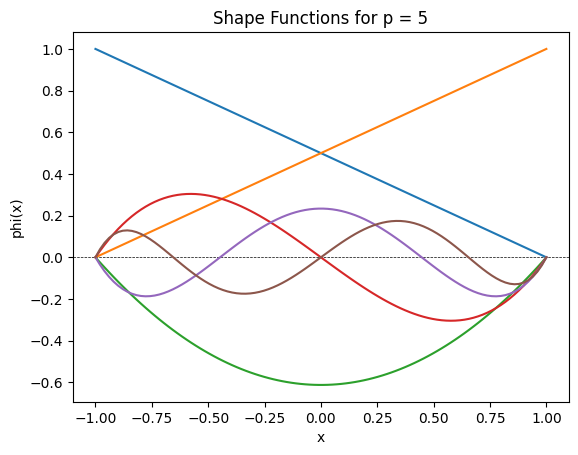

In [17]:
p = 5

if p == 1:
    phi, _ = ShapeFunctions.linear()
elif p == 2:
    phi, _ = ShapeFunctions.quadratic()
else:
    phi, _ = ShapeFunctions.hierarchical(p)

x = np.linspace(-1, 1, 100)
phi_values = phi(x)

plt.title(f'Shape Functions for p = {p}')
plt.xlabel('x')
plt.ylabel('phi(x)')
plt.axhline(0, color='black', lw=0.5, ls='--')
for i in range(p + 1):
    plt.plot(x, phi_values[i], label=f'phi_{i}(x)')
plt.show()

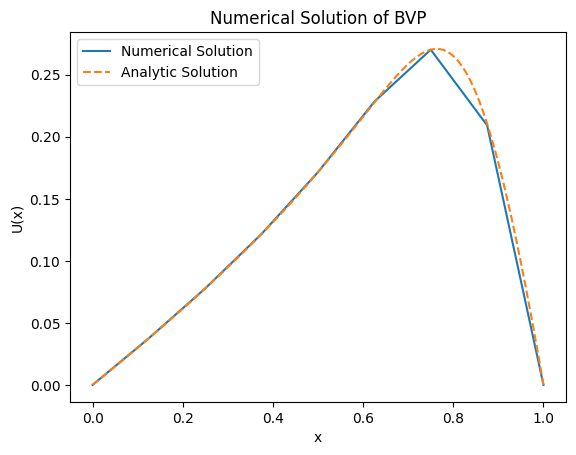

In [28]:
p = 2
n = 4

a = 5
xb = 0.8
u = analytic_solution(a, xb)

nodes, U = solve_boundary_value_problem(
    length=1.0,
    num_elements=n,
    p=p,
    rhs_function=rhs_function(a=5, xb=0.8),
)

x = np.linspace(0, nodes[-1], 100)

plt.plot(nodes, U, label='Numerical Solution')
plt.plot(x, u(x), label='Analytic Solution', linestyle='--')
plt.title('Numerical Solution of BVP')
plt.xlabel('x')
plt.ylabel('U(x)')
plt.legend()
plt.show()